In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
from os import path

In [39]:
files = glob(path.join("..", "from_arc", "*d_cv.csv"))

In [40]:
cort_dice_list = []
trab_dice_list = []
label_list = []
best_version_list = []
for file in files:
    # read in the data to a dataframe
    df = pd.read_csv(file)
    # drop the first column that is just an index from the csv
    df.drop(columns=["Unnamed: 0"], inplace=True)
    # extract just label, version, fold, and validation cortical dice
    df = df[['label', 'version', 'fold', 'metrics_val_dsc_0_epoch_final', 'metrics_val_dsc_1_epoch_final']]
    # group by the label and version and get the mean validation cortical dice
    df = df.groupby(['label', 'version']).mean().drop(columns=['fold']).sort_values(by='metrics_val_dsc_0_epoch_final', ascending=False).iloc[0]
    cort_dice_list.append(df[0])
    trab_dice_list.append(df[1])
    label_list.append(df.name[0])
    best_version_list.append(df.name[1])

df = pd.DataFrame(
    list(zip(label_list, best_version_list, cort_dice_list, trab_dice_list)),
    columns = ['label', 'best_version', 'cort DSC', 'trab DSC']
)

In [41]:
df

,label,best_version,cort DSC,trab DSC
0,unet_3d_cv,16637246,0.953690,0.949654
1,unet_2d_cv,16626362,0.918798,0.920382
2,segresnetvae_3d_cv,16639327,0.959760,0.962602
3,segresnetvae_2d_cv,16636140,0.938838,0.967127
4,unetpp_2d_cv,16635994,0.925926,0.956558
5,unetpp_3d_cv,16639320,0.964944,0.965897
6,unetr_2d_cv,16635789,0.934093,0.962775
7,segan_3d_cv,16639287,0.957189,0.957923
8,unetr_3d_cv,16639306,0.962322,0.965689
9,segan_2d_cv,16629957,0.941258,0.963090


In [43]:
df["dim"] = df["label"].apply(lambda x: x[-5:-3])
df["label"] = df["label"].apply(lambda x: x[0:-6])

labels_renaming = {
    "unet": "UNet",
    "unetpp": "UNet++",
    "unetr": "UNETR",
    "segresnetvae": "SegResNetVAE",
    "segan": "SeGAN"
}
df = df.replace({"label": labels_renaming})

In [44]:
df

,label,best_version,cort DSC,trab DSC,dim
0,UNet,16637246,0.953690,0.949654,3d
1,UNet,16626362,0.918798,0.920382,2d
2,SegResNetVAE,16639327,0.959760,0.962602,3d
3,SegResNetVAE,16636140,0.938838,0.967127,2d
4,UNet++,16635994,0.925926,0.956558,2d
5,UNet++,16639320,0.964944,0.965897,3d
6,UNETR,16635789,0.934093,0.962775,2d
7,SeGAN,16639287,0.957189,0.957923,3d
8,UNETR,16639306,0.962322,0.965689,3d
9,SeGAN,16629957,0.941258,0.963090,2d


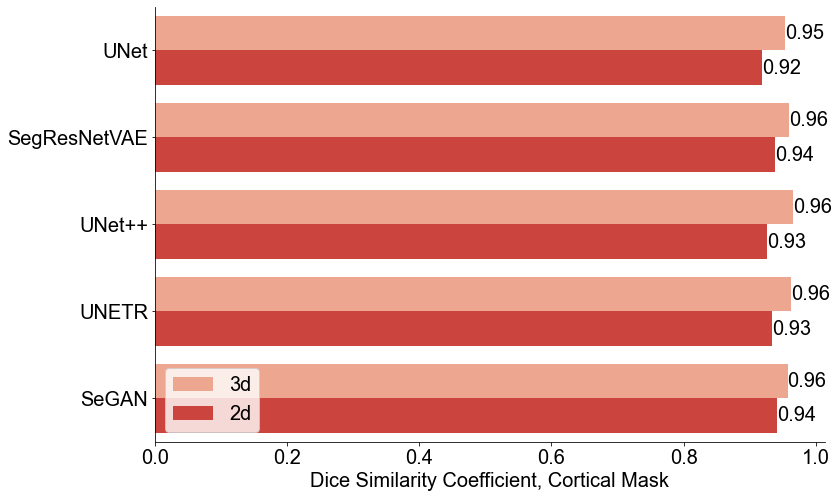

In [46]:
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Arial',
      'font.size' : 20}
plt.rcParams.update(rc)

plt.rcParams.update(rc)

plt.figure(figsize=(12,8))

ax = sns.barplot(data=df, y="label", x="cort DSC", hue="dim", palette="Reds")
plt.legend(loc="lower left")

ax.set(
    ylabel="",
    xlabel="Dice Similarity Coefficient, Cortical Mask"
)

for i in ax.containers:
    ax.bar_label(i, fmt="%0.2f")

plt.grid(axis="x")
sns.despine()

plt.show()